In [88]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

featureAndTarget = ['wtd_mean_atomic_mass', 'wtd_mean_atomic_radius',
                 'wtd_mean_fie',  'wtd_mean_ElectronAffinity', 
                 'wtd_mean_Density', 'wtd_mean_FusionHeat',
                 'wtd_mean_ThermalConductivity', 'wtd_mean_Valence',
                 'critical_temp']  # first 8 are features, the last is target; 'wtd' means weighted; 'fie' is 1st ionization energy
df = pd.read_csv('https://raw.githubusercontent.com/AlexUCAS/ML_SC_LR/main/train.csv', usecols=featureAndTarget)

In [89]:
df.shape

(21263, 9)

In [91]:
x = df[featureAndTarget[:-1]]  # features
model = LinearRegression()
model.fit(x, df['critical_temp'])
df['predicted'] = model.predict(x)  # add a predicted Tc column near to the measured
df.shape

(21263, 10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

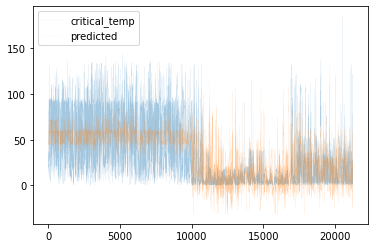

In [92]:
df[['critical_temp', 'predicted']].plot(alpha=0.4, linewidth=0.1)
plt.savefig('plot.pdf')

from google.colab import files
files.download('plot.pdf')

In [93]:
params = pd.Series(model.coef_, index=df[featureAndTarget[:-1]].columns)

In [94]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(x, df['critical_temp'])).coef_
              for i in range(1000)], 0)
print(pd.DataFrame({'effect': params.round(3),
                    'error': err.round(3)}))

                              effect  error
wtd_mean_atomic_mass           0.183  0.009
wtd_mean_atomic_radius         0.499  0.015
wtd_mean_fie                   0.134  0.003
wtd_mean_ElectronAffinity     -0.107  0.010
wtd_mean_Density              -0.005  0.000
wtd_mean_FusionHeat           -0.240  0.013
wtd_mean_ThermalConductivity   0.284  0.007
wtd_mean_Valence              -5.484  0.300
